In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [25]:
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

'%.3f'

In [26]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

데이터 : 서울시 착한가격음식점(별점추가), 서울 음식점 샘플2000(아이디)(별점추가)

In [4]:
df1=pd.read_csv('./data/서울시 착한가격음식점(별점추가).csv',encoding='euc-kr')
df2=pd.read_csv('./data/서울 음식점 샘플2000(아이디)(별점추가).csv',encoding='euc-kr')

In [18]:
index1=df1[df1['별점']=='-'].index
df1.drop(index1,inplace=True)

In [19]:
index2=df2[df2['별점']=='-'].index
df2.drop(index2,inplace=True)

In [48]:
df1=df1.astype({'별점':'float'})
df2=df2.astype({'별점':'float'})

In [50]:
df1_scores = np.array(df1['별점'])
df2_scores = np.array(df2['별점'])

In [58]:
# df1_scores
# df2_scores

In [39]:
freq, e  = np.histogram(df1_scores, bins=10, range=(0,5))
freq
e

array([  0,   0,   0,   0,   0,   0,   3,  17, 420,  98], dtype=int64)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [45]:
# freq_class = [f'{i}~{i+0.5}' for i in range(0,5,0.5)]
freq_class = ['0~0.5','0.5~1.0','1.0~1.5','1.5~2.0','2.0~2.5','2.5~3.0','3.0~3.5','3.5~4.0','4.0~4.5','4.5~5.0']
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~0.5,0
0.5~1.0,0
1.0~1.5,0
1.5~2.0,0
2.0~2.5,0
2.5~3.0,0
3.0~3.5,3
3.5~4.0,17
4.0~4.5,420


(array([  0.,   0.,   0.,   0.,   0.,   0.,   3.,  17., 420.,  98.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

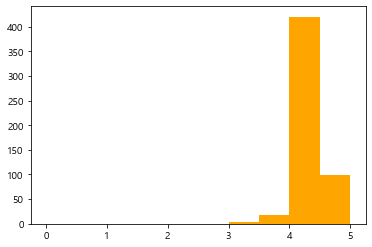

In [47]:
plt.hist(df1_scores,bins=10,range=(0,5),color='orange')
# 한 개의 데이터의 분포를 확인할 때 히스토그램

(array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,  21., 774., 306.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

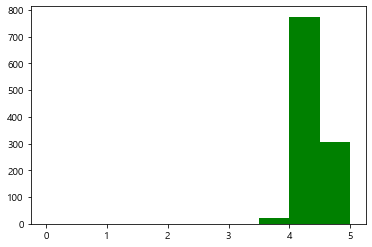

In [55]:
plt.hist(df2_scores,bins=10,range=(0,5),color='green')
# 한 개의 데이터의 분포를 확인할 때 히스토그램

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

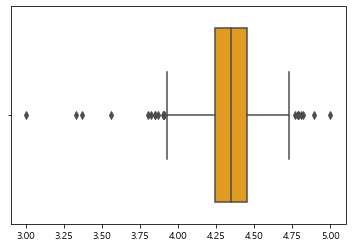

In [56]:
import seaborn as sns
sns.boxplot(df1_scores,color='orange')
# 두 개 이상 수치형 데이터의 분포를 확인할 때 박스플롯

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

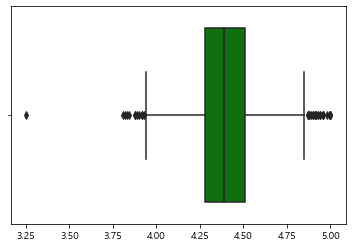

In [57]:
sns.boxplot(df2_scores,color='green')